# Arbeidskrav 9: bildebehandling

Bruk teknikkene beskrevet i [«Scipy Lecture Notes»](https://scipy-lectures.org/advanced/image_processing/index.html) til å telle hvor mange disker det er  bildet `dots.jpg`. Tips til rekkefølge på operasjoner:

* Les inn bildet
* Konverter til gråtone
* Terskle bildet slik at det blir binært
* Gjør nødvendige operasjoner på det binære bildet (matematisk morfologi fra `scipy.ndimage`)
* Bruk målemetoder (fra `scipy.ndimage`)

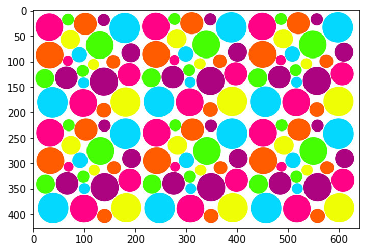

In [5]:
import matplotlib.pyplot as plt
import scipy.ndimage as nd
img=plt.imread("dots.jpg")

plt.imshow(img)
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

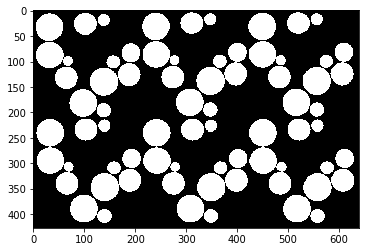

In [6]:
from skimage import io,filters
image=io.imread('dots.jpg',as_gray=True)
value=filters.threshold_otsu(image)
drops=nd.binary_fill_holes(image<value)

plt.imshow(drops, cmap='gray')
plt.show

In [7]:
from skimage import measure
labels = measure.label(drops)
print(labels.max())



68


0.3032679738562091 1.0


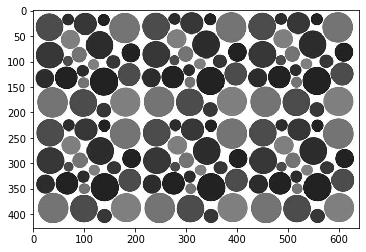

In [35]:
grey_im =img.astype(float).sum(2) / (255 * 3)
plt.imshow(grey_im, plt.cm.gray)
print(grey_im.min(), grey_im.max())


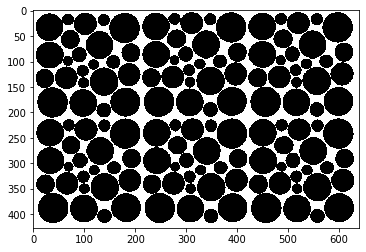

In [8]:
import skimage.data as data
from skimage import io
from skimage.filters import threshold_otsu
#img=io.imread('dots.jpg')
thresh=threshold_otsu(grey_im)
binary=grey_im>thresh
plt.imshow(binary,cmap='gray')

In [31]:
import scipy as sc
import numpy as np
from scipy import ndimage
kernal=np.zeros((7,7), dtype=np.int)
kernal[1:6,2:5]=1
print(kernal,'\n')

erosion=ndimage.binary_erosion(binary).astype(kernal.dtype)

print(erosion)


[[0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0]] 

[[0 0 0 ... 0 0 0]
 [0 1 1 ... 1 1 0]
 [0 1 1 ... 1 1 0]
 ...
 [0 1 1 ... 1 1 0]
 [0 1 1 ... 1 1 0]
 [0 0 0 ... 0 0 0]]


In [30]:
ndimage.binary_erosion(kernal, structure=np.ones((5,5))).astype(kernal.dtype)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [35]:
binary_dil=ndimage.binary_dilation(binary).astype(kernal.dtype)
b_d=ndimage.binary_dilation(binary).astype(kernal.dtype)
print(binary_dil)
b_d


[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [36]:
a = np.zeros((5,5), dtype=np.int)
a[1:4, 1:4] = 1; a[4, 4] = 1
a

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 1]])

In [37]:
ndimage.binary_opening(a, structure=np.ones((3,3))).astype(np.int)

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0]])